In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm

In [2]:
df = pd.read_pickle('Data/Processed Data/ML/DT-ml.pkl')

In [3]:
df.head()

,name,pr,cp,count,headline_count,text_count
0,AAG Jinnah,0.000070,3,1,0.0,1
1,AK Nasim Khan,0.000099,1,1,0.0,1
2,AKM Yusuf,0.000035,1,1,0.0,4
3,AKMA Hamid,0.000033,1,1,0.0,1
4,AQM Badruddoza Chowdhury,0.000089,3,5,0.0,5


In [6]:
X = df[['pr', 'count', 'headline_count', 'text_count']]
y = df['cp']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.58      0.98      0.73      1045
          2       0.16      0.06      0.08       469
          3       0.14      0.04      0.06       241
          4       0.00      0.00      0.00       123
          5       0.00      0.00      0.00        71
          6       0.00      0.00      0.00        44
          7       0.33      0.10      0.15        21
          8       0.40      0.25      0.31         8
          9       0.00      0.00      0.00         2

avg / total       0.36      0.53      0.41      2024



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
print(confusion_matrix(y_test, y_pred))

[[1027   18    0    0    0    0    0    0    0]
 [ 442   26    1    0    0    0    0    0    0]
 [ 195   36   10    0    0    0    0    0    0]
 [  78   36    9    0    0    0    0    0    0]
 [  22   30   17    0    0    1    1    0    0]
 [   9   14   21    0    0    0    0    0    0]
 [   1    2   10    0    0    3    2    3    0]
 [   0    0    2    0    0    1    3    2    0]
 [   1    1    0    0    0    0    0    0    0]]


In [31]:
logreg.score(X_test, y_test)

0.5271739130434783

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [35]:
print(knn.score(X_test, y_test))

0.633399209486166


In [37]:
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }

In [43]:
# clf = GridSearchCV(svm.SVC(class_weight='balanced'), params_grid)

In [47]:
# clf.fit(X_train, y_train)

In [48]:
clf = svm.SVC(gamma=0.001, C=100)

In [49]:
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
print(clf.score(X_test, y_test))

0.5395256916996047


In [54]:
X_scaled = scale(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, stratify=y)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
logreg.score(X_test, y_test)

0.532608695652174

In [60]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [61]:
knn.score(X_test, y_test)

0.6892292490118577

In [62]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5454545454545454

In [67]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [69]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

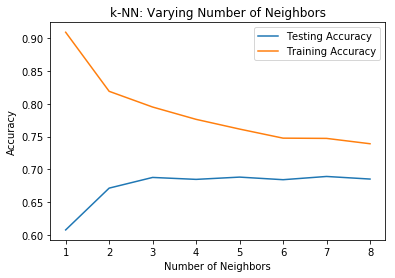

In [73]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Big woops.